<a href="https://colab.research.google.com/github/vines2021/Deep-learning-Assignment-2/blob/main/DL_assgn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D, Input, Lambda, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np

In [ ]:
InceptionV3_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False

x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=4, activation='softmax')(x)
model = Model(InceptionV3_model.input, output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

 conv2d_11 (Conv2D)          (None, 25, 25, 32)           6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, 25, 25, 64)           192       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, 25, 25, 64)           192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, 25, 25, 96)           288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, 25, 25, 64)           0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, 25, 25, 288)          0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_28 (Conv2D)          (None, 25, 25, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 25, 25, 96)           288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 25, 25, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 12, 12, 384)          995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, 12, 12, 192)          172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, 12, 12, 192)          147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 12, 12, 192)          576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 12, 12, 768)          0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, 12, 12, 192)          147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, 12, 12, 192)          215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 12, 12, 160)          0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 12, 12, 768)          0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, 12, 12, 192)          576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 12, 12, 192)          576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 12, 12, 192)          0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, 5, 5, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, 5, 5, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 5, 5, 320)            960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 5, 5, 192)            576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 5, 5, 192)            576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, 5, 5, 384)            0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

In [ ]:
train_gen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,
                                   zoom_range = 0.2,horizontal_flip = True)
test_gen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train = train_gen.flow_from_directory('Data/train',target_size = (224, 224),
                                      batch_size = 32,class_mode = 'categorical')

Found 613 images belonging to 4 classes.


In [ ]:
test = train_gen.flow_from_directory('Data/test',target_size=(224, 224),
                                     batch_size=32,class_mode='categorical')

Found 315 images belonging to 4 classes.


In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
history = model.fit(train,validation_data=test,epochs=10,
              steps_per_epoch=len(train),validation_steps=len(test))

Epoch 1/10
20/20 [==============================] - 39s 2s/step - loss: 1.2733 - accuracy: 0.4502 - val_loss: 0.8359 - val_accuracy: 0.6413
Epoch 2/10
20/20 [==============================] - 34s 2s/step - loss: 0.9113 - accuracy: 0.5856 - val_loss: 0.8577 - val_accuracy: 0.5968
Epoch 3/10
20/20 [==============================] - 37s 2s/step - loss: 0.7395 - accuracy: 0.6688 - val_loss: 0.8783 - val_accuracy: 0.6286
Epoch 4/10
20/20 [==============================] - 34s 2s/step - loss: 0.6698 - accuracy: 0.7178 - val_loss: 0.8953 - val_accuracy: 0.6571
Epoch 5/10
20/20 [==============================] - 34s 2s/step - loss: 0.5311 - accuracy: 0.7781 - val_loss: 0.8832 - val_accuracy: 0.6444
Epoch 6/10
20/20 [==============================] - 35s 2s/step - loss: 0.3947 - accuracy: 0.8450 - val_loss: 0.6993 - val_accuracy: 0.7238
Epoch 7/10
20/20 [==============================] - 39s 2s/step - loss: 0.3585 - accuracy: 0.8711 - val_loss: 0.5858 - val_accuracy: 0.7778
Epoch 8/10
20/20 [==

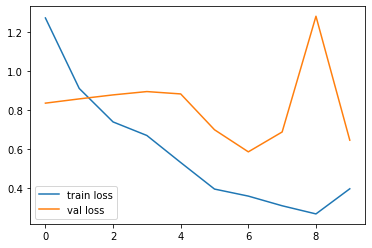

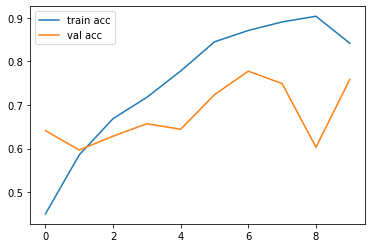

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
y_pred=model.predict(test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

10/10 [==============================] - 14s 1s/step


array([3, 3, 1, 2, 3, 3, 0, 0, 3, 2, 2, 0, 1, 3, 3, 3, 0, 1, 0, 0, 2, 3,
       2, 0, 3, 0, 1, 3, 3, 3, 0, 3, 0, 1, 2, 3, 3, 3, 3, 3, 3, 0, 2, 0,
       0, 0, 2, 1, 3, 1, 2, 3, 1, 3, 0, 1, 3, 3, 0, 0, 3, 3, 0, 0, 3, 2,
       3, 1, 3, 3, 0, 1, 0, 0, 3, 0, 3, 0, 3, 2, 3, 2, 1, 1, 0, 3, 3, 0,
       3, 2, 3, 3, 3, 3, 0, 2, 3, 3, 3, 0, 3, 2, 0, 0, 3, 3, 0, 1, 0, 2,
       2, 0, 3, 1, 3, 3, 2, 0, 1, 0, 3, 1, 3, 0, 0, 2, 3, 3, 2, 3, 0, 1,
       3, 3, 3, 1, 2, 1, 0, 3, 2, 0, 0, 0, 3, 0, 0, 0, 2, 3, 0, 3, 0, 0,
       3, 3, 0, 1, 0, 0, 0, 3, 1, 2, 3, 2, 0, 3, 0, 3, 1, 3, 0, 0, 2, 3,
       3, 0, 2, 3, 0, 0, 1, 0, 3, 0, 2, 3, 3, 2, 1, 2, 0, 3, 0, 3, 3, 3,
       3, 2, 0, 1, 3, 3, 0, 2, 1, 3, 0, 3, 3, 3, 2, 0, 1, 0, 1, 2, 0, 3,
       3, 0, 2, 2, 1, 3, 3, 3, 2, 0, 2, 0, 0, 2, 0, 3, 2, 3, 3, 0, 3, 2,
       3, 1, 3, 1, 2, 0, 1, 0, 3, 0, 0, 0, 2, 2, 3, 3, 3, 0, 3, 0, 0, 0,
       1, 3, 1, 3, 3, 2, 3, 2, 3, 3, 0, 3, 1, 0, 3, 3, 1, 0, 0, 0, 2, 0,
       0, 2, 3, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 1, 3,

In [ ]:
classes = ["AdenocarcinomaChest Lung Cancer ","Large cell carcinoma Lung Cancer" ,
           "NO Lung Cancer/ NORMAL" , "Squamous cell carcinoma Lung Cancer"]

In [ ]:
def predict_image(img):
    plt.figure(figsize=(40,8))
    print('-----------------------------------Chest Cancer Type Detection---------------------------------------------------')
    x=image.img_to_array(img)
    x=x/255
    plt.imshow(img)
    x=np.expand_dims(x,axis=0)
    print(classes[np.argmax(model.predict(x))])

-----------------------------------Chest Cancer Type Detection---------------------------------------------------
1/1 [==============================] - 1s 1s/step
AdenocarcinomaChest Lung Cancer 


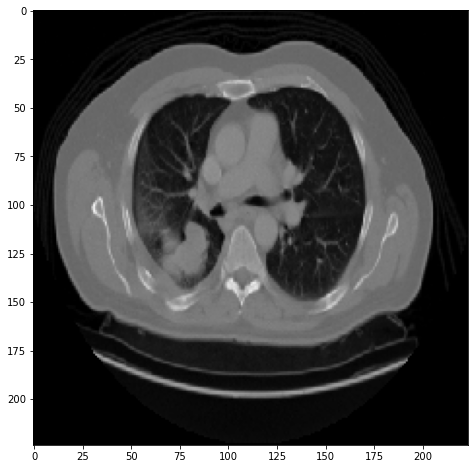

In [ ]:
im=image.load_img('Data/test/adenocarcinoma/000113 (7).png',target_size=(224,224))
predict_image(im)